<a href="https://colab.research.google.com/github/Tiberu2611/BaiTapPython/blob/main/Do_an_tkmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Các Thư Viện để thực hiện thống kê mô tả

In [15]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy  
from scipy import stats
import statsmodels.stats.multicomp as mc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Đọc tập dữ liệu Inc_Exp_Data.csv 

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/Inc_Exp_Data.csv')

Mounted at /content/drive


Hiển thị các thông số cơ bản của tập dữ liệu

In [31]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


Phân tích dữ liệu định lượng

Sao chép các cột dữ liệu định lượng sang 1 dataframe khác

In [23]:
df1 = pd.DataFrame(df, columns = ['Mthly_HH_Income','Mthly_HH_Expense','Emi_or_Rent_Amt','Annual_HH_Income'])
df1.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,2000,64200
1,6000,7000,3000,79920
2,10000,4500,0,112800
3,10000,2000,0,97200
4,12500,12000,3000,147000
5,14000,8000,0,196560
6,15000,16000,35000,167400
7,18000,20000,8000,216000
8,19000,9000,0,218880
9,20000,9000,0,220800


**Các giá trị thống kê cơ bản của tập dữ liệu**

In [28]:
df1.describe() 

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
count,50.000000,50.000000,50.000000,5.000000e+01
mean,41558.000000,18818.000000,3060.000000,4.900190e+05
std,26097.908979,12090.216824,6241.434948,3.201358e+05
min,5000.000000,2000.000000,0.000000,6.420000e+04
25%,23550.000000,10000.000000,0.000000,2.587500e+05
50%,35000.000000,15500.000000,0.000000,4.474200e+05
75%,50375.000000,25000.000000,3500.000000,5.947200e+05
max,100000.000000,50000.000000,35000.000000,1.404000e+06


**Hệ số tương quan**

In [8]:
corr = df1.corr(method='pearson')
corr

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
Mthly_HH_Income,1.000000,0.649215,0.036976,0.970315
Mthly_HH_Expense,0.649215,1.000000,0.405280,0.591222
Emi_or_Rent_Amt,0.036976,0.405280,1.000000,0.002716
Annual_HH_Income,0.970315,0.591222,0.002716,1.000000


**Hiệp phương sai**

In [9]:
cov = df1.cov()
cov

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
Mthly_HH_Income,6.811009e+08,2.048465e+08,6.022980e+06,8.106864e+09
Mthly_HH_Expense,2.048465e+08,1.461733e+08,3.058257e+07,2.288330e+09
Emi_or_Rent_Amt,6.022980e+06,3.058257e+07,3.895551e+07,5.426263e+06
Annual_HH_Income,8.106864e+09,2.288330e+09,5.426263e+06,1.024869e+11


***MÔ TẢ TRỰC QUAN HÓA DỮ LIỆU***

**Định lượng**

Biểu đồ boxplot các cột dữ liệu định lượng

Biểu đồ boxplot cột Mthly_HH_Income

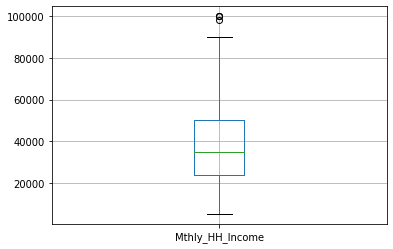

In [25]:
df.boxplot(column=['Mthly_HH_Income'])

Biểu đồ boxplot cột Mthly_HH_Expense

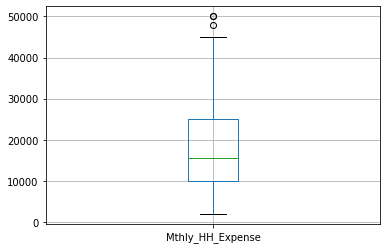

In [13]:
df.boxplot(column=['Mthly_HH_Expense'])

Biểu đồ boxplot cột Emi_or_Rent_Amt

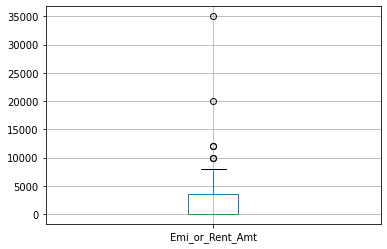

In [ ]:
df.boxplot(column=['Emi_or_Rent_Amt'])

Biểu đồ boxplot cột Annual_HH_Income

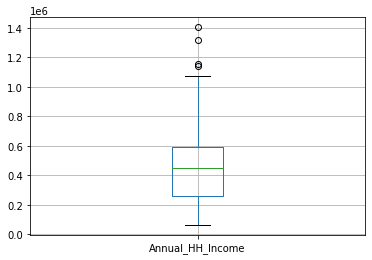

In [ ]:
df.boxplot(column=['Annual_HH_Income'])

**Biểu đồ scatterplot của các cột dữ liệu định lượng**

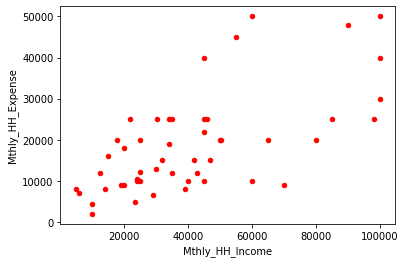

In [ ]:
sc = df1.plot.scatter(x ='Mthly_HH_Income', y = 'Mthly_HH_Expense', c = 'red')

Biểu đồ nhiệt của các cột dữ liệu định lượng

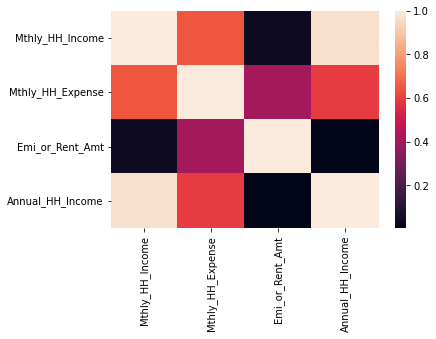

In [29]:
sns.heatmap(corr)


Biểu đồ đường của các cột dữ liệu định lượng

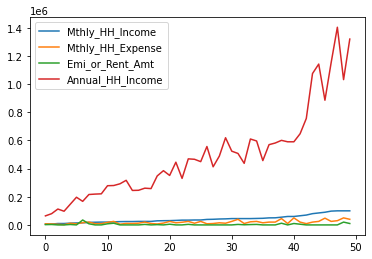

In [30]:
for cl in df1.columns:
  plt.plot(df1[cl],label = cl)
plt.legend() 
plt.show()

Biểu đồ histogram của các cột dữ liệu định lượng

Cột dữ liệu Mthly_HH_Income

Text(0.5, 1.0, 'Mthly_HH_Income')

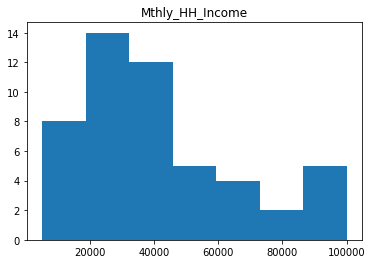

In [ ]:
q25, q75 = np.percentile(df['Mthly_HH_Income'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Mthly_HH_Income']) ** (-1/3)
bins = round((df['Mthly_HH_Income'].max() - df['Mthly_HH_Income'].min()) / bin_width)
plt.hist(df['Mthly_HH_Income'],bins=bins)
plt.title('Mthly_HH_Income')

Cột dữ liệu Mthly_HH_Expense

Text(0.5, 1.0, 'Mthly_HH_Expense')

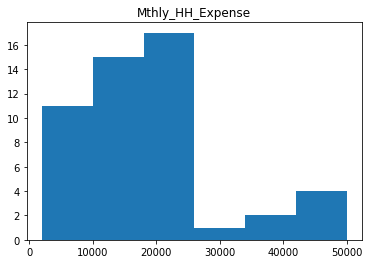

In [ ]:
q25, q75 = np.percentile(df['Mthly_HH_Expense'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Mthly_HH_Expense']) ** (-1/3)
bins = round((df['Mthly_HH_Expense'].max() - df['Mthly_HH_Expense'].min()) / bin_width)
plt.hist(df['Mthly_HH_Expense'],bins=bins)
plt.title('Mthly_HH_Expense')

Cột dữ liệu No_of_Fly_Members

Text(0.5, 1.0, 'No_of_Fly_Members')

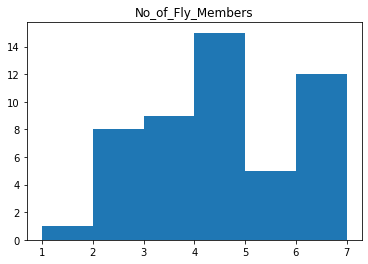

In [ ]:
q25, q75 = np.percentile(df['No_of_Fly_Members'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['No_of_Fly_Members']) ** (-1/3)
bins = round((df['No_of_Fly_Members'].max() - df['No_of_Fly_Members'].min()) / bin_width)
plt.hist(df['No_of_Fly_Members'],bins=bins)
plt.title('No_of_Fly_Members')

Cột dữ liệu Emi_or_Rent_Amt

Text(0.5, 1.0, 'Emi_or_Rent_Amt')

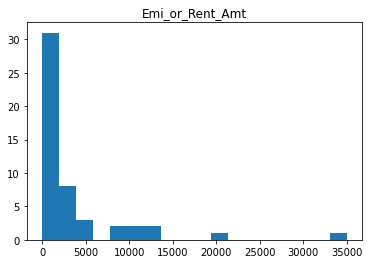

In [ ]:
q25, q75 = np.percentile(df['Emi_or_Rent_Amt'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Emi_or_Rent_Amt']) ** (-1/3)
bins = round((df['Emi_or_Rent_Amt'].max() - df['Emi_or_Rent_Amt'].min()) / bin_width)
plt.hist(df['Emi_or_Rent_Amt'],bins=bins)
plt.title('Emi_or_Rent_Amt')

Cột dữ liệu Annual_HH_Income

Text(0.5, 1.0, 'Annual_HH_Income')

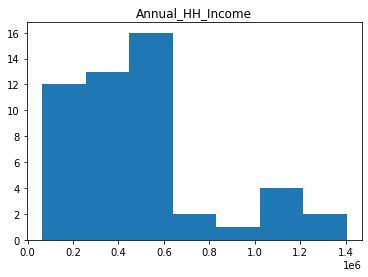

In [ ]:
q25, q75 = np.percentile(df['Annual_HH_Income'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Annual_HH_Income']) ** (-1/3)
bins = round((df['Annual_HH_Income'].max() - df['Annual_HH_Income'].min()) / bin_width)
plt.hist(df['Annual_HH_Income'],bins=bins)
plt.title('Annual_HH_Income')

Cột dữ liệu No_of_Earning_Members

Text(0.5, 1.0, 'No_of_Earning_Members')

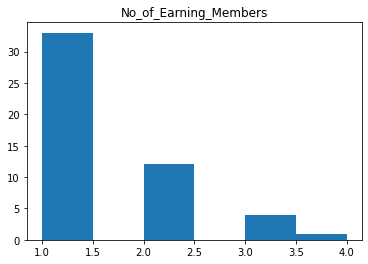

In [ ]:

q25, q75 = np.percentile(df['No_of_Earning_Members'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['No_of_Earning_Members']) ** (-1/3)
bins = round((df['No_of_Earning_Members'].max() - df['No_of_Earning_Members'].min()) / bin_width)
plt.hist(df['No_of_Earning_Members'],bins=bins)
plt.title('No_of_Earning_Members')

**Biểu đồ cặp các cột dữ liệu định lượng**

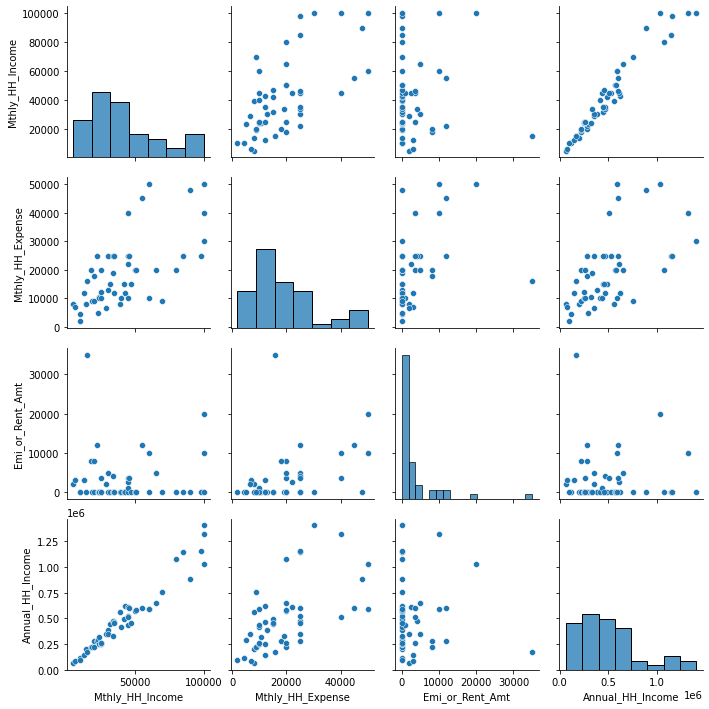

In [26]:
sns.pairplot(df1)